# **Predicting The Bike Rental Demand**


![Image Alt Text](Customer-Analysis.png)

# Table of Contents :

1. Introduction
2. Goal Of the Project
3. Data Story
4. Data Preprocessing


# **1. Introduction**

#Introduction of the project

# **2. Goal of the Project**

The main objective is to build a machine learning model that can accurately predict the number of bike retals, using various feature engineering techniques and machine learning models. The performance of the model will be evaluated.

# **3. Data Story/Source**

About dataset

Source of the data is from   UC Irvine Machine Learning Repository.

Link : https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset



**Dataset Description**

Shape and pecularities of dataset

# **Features/columns:**
Explain about column in one or two sentences

**TOOL USED**

 #explain the libraries and methods used

# **Data Preprocessing**

**1.Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**2. Load the dataset**

In [3]:
# load the dataset
data=pd.read_csv("Renatl Bike Sharing system hr.csv")
data

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**3.Understand the data structure**

In [4]:
data.head()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
data.shape

(17379, 16)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12)
memory usage: 2.1 MB


Dataset Overview

- 17379 rows (entries)
- 16 columns (features)
- Mix of integer (12) and float (4) data types

In [7]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
# Dropping the unnecessary columns
data.drop(['instant','casual','registered'],axis=1,inplace=True)

In [10]:
data.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

**4.Handle Missing Data**

In [11]:
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


After checking the missing values in the dataframe, it shows there are no missing values. As no null values, dropna() not used.

**5.Handle Duplicates**

In [12]:
data.duplicated().sum()

2

In [13]:
data.drop_duplicates(inplace=True)

**6.Handle outliers**

In [14]:
data.skew()

season       -0.005253
yr           -0.010244
mnth         -0.009188
hr           -0.010903
holiday       5.638184
weekday      -0.003012
workingday   -0.785362
weathersit    1.227874
temp         -0.006004
atemp        -0.090436
hum          -0.111157
windspeed     0.574719
cnt           1.277328
dtype: float64

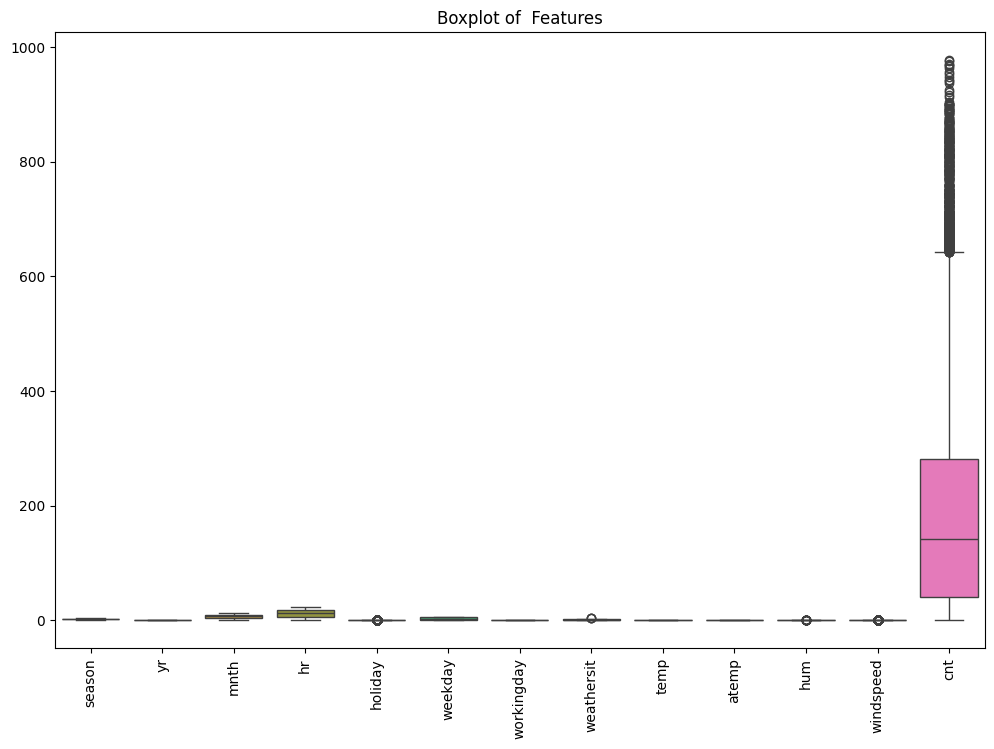

In [15]:
#boxplot to detect potential outliers in  data
plt.figure(figsize=(12, 8))
sns.boxplot(data)
plt.xticks(rotation=90)
plt.title('Boxplot of  Features')
plt.show()

In [ ]:
#create histograms and boxplot as next steps if required as part of EDA

In [16]:
data["holiday"].value_counts()

holiday
0    16877
1      500
Name: count, dtype: int64

Holiday shows more than 5 skewness so we check the value count distribution of holiday. Here the holiday feature shows a greater difference in  value count and it's unnecessary for predicting so drop the column.



In [17]:
data.drop(['holiday'],axis=1,inplace=True)

In [18]:
#IQR method for outlier removal
def remove_outliers(data,columns):
  data_filtered=data.copy()

  for column in columns:
     Q1 = data[column].quantile(0.25)
     Q3 = data[column].quantile(0.75)
     IQR = Q3 - Q1

     lower_bound = Q1 - 1.5 * IQR
     upper_bound = Q3 + 1.5* IQR

     data_filtered = data_filtered[(data_filtered[column] >= lower_bound) & (data_filtered[column] <= upper_bound)]

  return data_filtered


In [19]:
new_data=remove_outliers(data,['workingday','weathersit','windspeed','cnt'])

Removing the outliers from 'workingday', 'weathersit', 'windspeed', 'cnt' by using remove_ outliers function.

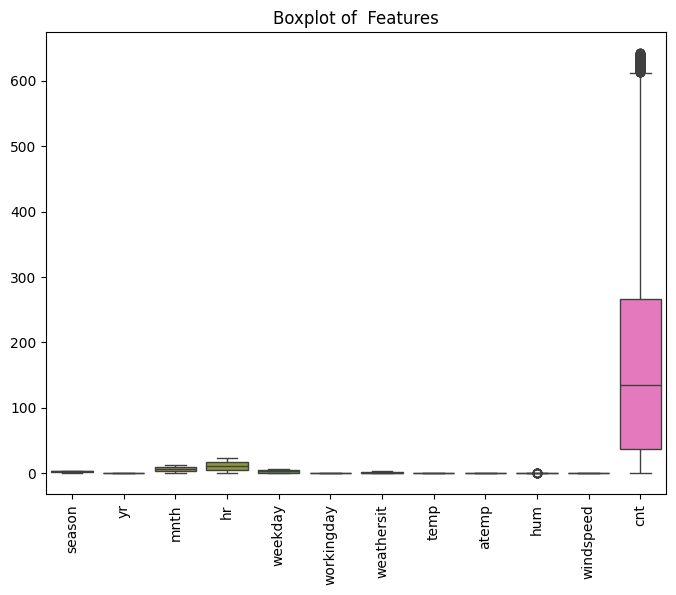

In [20]:
# Visualization of outliers after removing outliers of different features using boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(new_data)
plt.xticks(rotation=90)
plt.title('Boxplot of  Features')
plt.show()

Here we can see there are still some outliers presented after outlier removal in some features.

In [21]:
new_data.skew()

season       -0.008125
yr            0.049845
mnth         -0.010593
hr            0.028373
weekday       0.000901
workingday   -0.766804
weathersit    1.206441
temp          0.015824
atemp        -0.060652
hum          -0.131877
windspeed     0.229032
cnt           0.929696
dtype: float64

After IQR method there is still outliers in cnt ,weathersit and workingday.

In [22]:
# Applying log transformation to skewed features
# Applying log transformation to any feature with skewness > 1 or < -1
new_data= new_data.copy()
for col in new_data.columns:
    if new_data[col].skew() > 1 or new_data[col].skew() < -1:
        new_data[col] = np.log1p(new_data[col])

print("\nSkewness after log transformation:")
print(new_data.skew())


Skewness after log transformation:
season       -0.008125
yr            0.049845
mnth         -0.010593
hr            0.028373
weekday       0.000901
workingday   -0.766804
weathersit    0.977183
temp          0.015824
atemp        -0.060652
hum          -0.131877
windspeed     0.229032
cnt           0.929696
dtype: float64


In [23]:
new_data.shape

(16538, 12)

After log transformation, the skewness is reduced.

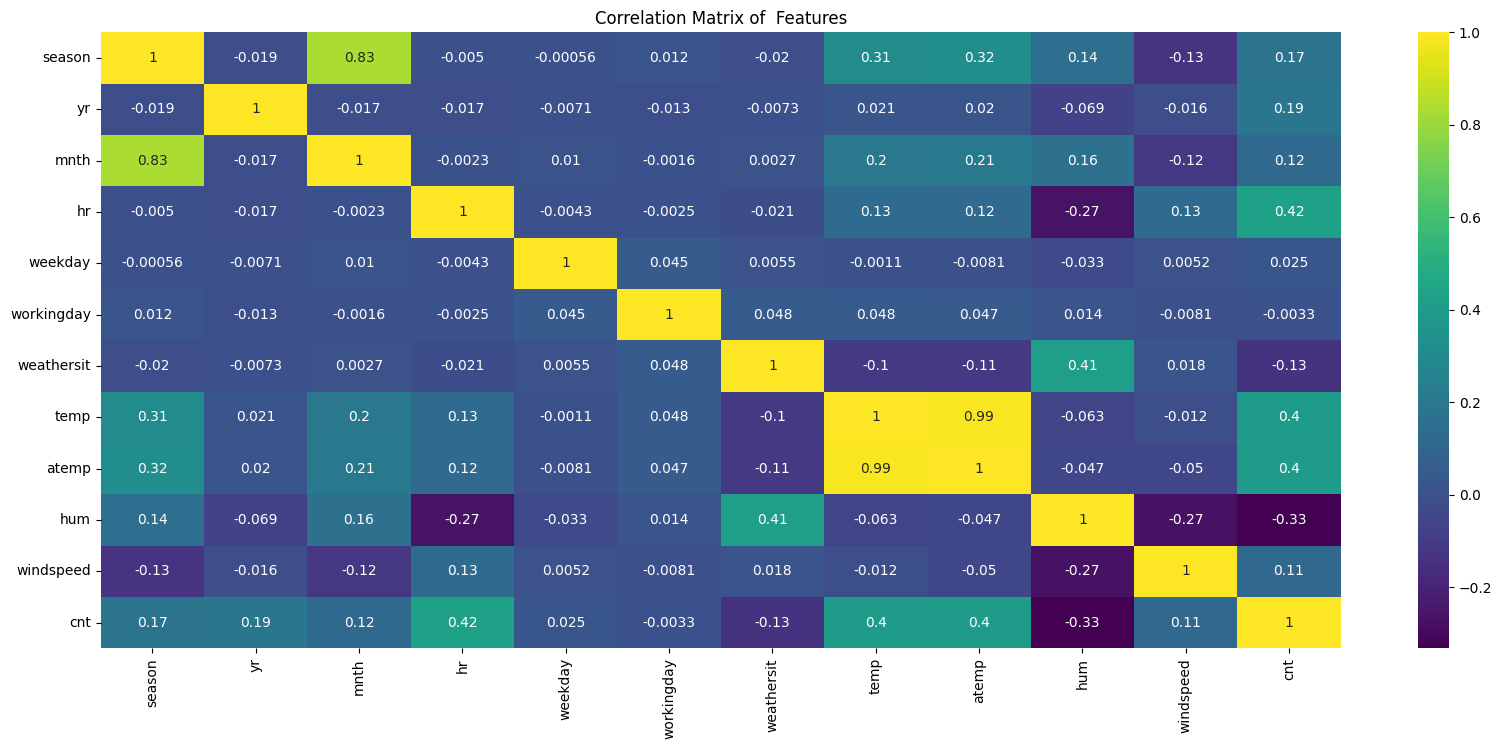

In [24]:
# Correlation Matrix 
# heatmap will help you understand relationships betweenl features
# we can check multi collinearity
plt.figure(figsize=(20,8))
sns.heatmap(new_data.corr(), annot=True, cmap='viridis')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of  Features')
plt.show()

### Comment your important findings

  Eg: temp and atemp are highly correlated (0.99), which indicates redundancy. Including both in predictive models could lead to multicollinearity, so one of these variables could be dropped or used with regularization techniques.

These insights could guide feature selection, engineering, and understanding of key factors influencing bike rental demand.

# **Data Visualization/insights**

**Distribution of bike rental data (cnt)**

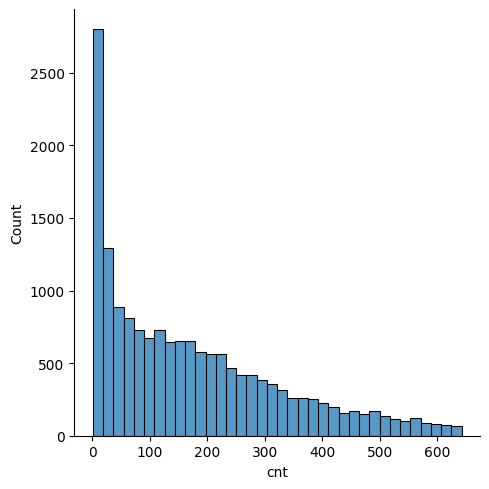

In [26]:
sns.displot(new_data["cnt"])


 It should show you a visual representation of the distribution of bike rental data (cnt). Here we can see the  higher frequency for a lower  count of rental bike .

Similarly create other visuals

In [28]:
new_data

,season,yr,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,0.693147,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,6,0,0.693147,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,6,0,0.693147,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,6,0,0.693147,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,6,0,0.693147,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,1,1,1.098612,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,1,1,1.098612,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,1,1,0.693147,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,1,1,0.693147,0.26,0.2727,0.56,0.1343,61


In [29]:
new_data.shape

(16538, 12)

Feature selection

In [35]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif 
import pandas as pd

#Separate categorical and numerical features

categorical_cols = new_data.select_dtypes (include=['object', 'bool']).columns

numerical_cols = new_data.select_dtypes (include=['int64', 'float64']).columns

X_categoricall= new_data[categorical_cols]

X_numerical = new_data[numerical_cols]

y = new_data['cnt']

#-------------------------
#Chi-squared test for categorical features

# chi_selector = SelectKBest (chi2, k=10) # K represents number of features. Adjust k as needed

# X_chi = chi_selector.fit_transform(X_categorical, y)

# chi_selected_features = X_categorical.columns[chi_selector.get_support()]
#------------------------


#ANOVA for numerical features

f_selector = SelectKBest(f_classif, k=10) # K represents number of features. Adjust k as needed

X_f = f_selector.fit_transform(X_numerical,y)

f_selected_features = X_numerical.columns[f_selector.get_support()]

# print("Chi-squared selected features:",chi_selected_features)

print("All columns",new_data.columns)

print("ANOVA selected features:", f_selected_features)

All columns Index(['season', 'yr', 'mnth', 'hr', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')
ANOVA selected features: Index(['season', 'yr', 'mnth', 'hr', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt'],
      dtype='object')


In [58]:
new_data

,season,yr,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,0.693147,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,6,0,0.693147,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,6,0,0.693147,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,6,0,0.693147,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,6,0,0.693147,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,1,1,1.098612,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,1,1,1.098612,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,1,1,0.693147,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,1,1,0.693147,0.26,0.2727,0.56,0.1343,61


In [59]:
# List of desired columns
selected_columns = ['season', 'yr', 'mnth', 'hr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Create a new DataFrame with only the selected columns
new_data_2 = new_data[selected_columns]
new_data_2

,season,yr,mnth,hr,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,1,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,1,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,1,0.26,0.2727,0.56,0.1343,61


**Split Data into Training and Testing Sets**

In [60]:
#  define the features (X) and target (y)

from sklearn.model_selection import train_test_split

X = new_data_2.drop('cnt',axis=1)
y = new_data_2['cnt']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13230, 9) (3308, 9) (13230,) (3308,)


In [61]:
X_train

,season,yr,mnth,hr,workingday,temp,atemp,hum,windspeed
13886,3,1,8,19,1,0.78,0.7424,0.59,0.1940
2039,2,0,3,20,1,0.24,0.2121,0.93,0.2985
8229,4,0,12,13,1,0.36,0.3636,0.57,0.1045
8278,4,0,12,14,1,0.34,0.3182,0.42,0.2239
16744,4,1,12,11,1,0.44,0.4394,0.44,0.2836
...,...,...,...,...,...,...,...,...,...
11651,2,1,5,16,0,0.68,0.6364,0.65,0.3881
12391,2,1,6,12,1,0.54,0.5152,0.56,0.2239
5516,3,0,8,18,1,0.72,0.6515,0.28,0.2985
881,1,0,2,5,1,0.06,0.1061,0.45,0.1045


In [62]:
X_test

,season,yr,mnth,hr,workingday,temp,atemp,hum,windspeed
13879,3,1,8,12,1,0.78,0.7273,0.55,0.0896
1067,1,0,2,5,1,0.32,0.3333,0.66,0.0896
10952,2,1,4,12,1,0.42,0.4242,0.35,0.2985
6578,4,0,10,16,1,0.58,0.5455,0.49,0.1940
4420,3,0,7,2,1,0.70,0.6667,0.74,0.1642
...,...,...,...,...,...,...,...,...,...
7512,4,0,11,15,1,0.64,0.6212,0.44,0.3284
3538,2,0,6,8,1,0.72,0.6970,0.79,0.1940
14339,3,1,8,16,0,0.66,0.6212,0.74,0.2985
14371,3,1,8,0,1,0.62,0.5758,0.83,0.0000


In [63]:
y_train

13886    640
2039      44
8229     133
8278     128
16744    172
        ... 
11651    540
12391    247
5516     609
881        7
16603    187
Name: cnt, Length: 13230, dtype: int64

In [64]:
y_test

13879    285
1067      12
10952    337
6578     323
4420      22
        ... 
7512     195
3538     454
14339    434
14371     32
12191      6
Name: cnt, Length: 3308, dtype: int64

**Feature Scaling**


Scaling your features is important and at the same time optional. Depends on your work and dataset avoid this step by trial and error if you find lots of missing data if you have done outlier removal and skewness correction before.

Do feature scaling only for train data (X_train & Y_train)

In [65]:
# Scaling using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [66]:
X_train_scaled#scaled

array([[ 0.44705269,  1.0241773 ,  0.41945966, ...,  1.56835049,
        -0.23625724,  0.10694521],
       [-0.45689154, -0.97639345, -1.03160489, ..., -1.52968491,
         1.55002761,  1.03719099],
       [ 1.35099691, -0.97639345,  1.58031129, ..., -0.6446154 ,
        -0.34133282, -0.68977247],
       ...,
       [ 0.44705269, -0.97639345,  0.41945966, ...,  1.03730878,
        -1.86492871,  1.03719099],
       [-1.36083576, -0.97639345, -1.3218178 , ..., -2.14894147,
        -0.97178629, -0.68977247],
       [ 1.35099691,  1.0241773 ,  1.29009838, ..., -0.73283024,
        -1.07686187,  0.37311123]])

In [73]:
X_train_scaled.shape

(13230, 9)

In [74]:
X_train.shape

(13230, 9)

In [67]:
X_test

,season,yr,mnth,hr,workingday,temp,atemp,hum,windspeed
13879,3,1,8,12,1,0.78,0.7273,0.55,0.0896
1067,1,0,2,5,1,0.32,0.3333,0.66,0.0896
10952,2,1,4,12,1,0.42,0.4242,0.35,0.2985
6578,4,0,10,16,1,0.58,0.5455,0.49,0.1940
4420,3,0,7,2,1,0.70,0.6667,0.74,0.1642
...,...,...,...,...,...,...,...,...,...
7512,4,0,11,15,1,0.64,0.6212,0.44,0.3284
3538,2,0,6,8,1,0.72,0.6970,0.79,0.1940
14339,3,1,8,16,0,0.66,0.6212,0.74,0.2985
14371,3,1,8,0,1,0.62,0.5758,0.83,0.0000


In [68]:
y_train

13886    640
2039      44
8229     133
8278     128
16744    172
        ... 
11651    540
12391    247
5516     609
881        7
16603    187
Name: cnt, Length: 13230, dtype: int64

In [70]:
from sklearn.preprocessing import StandardScaler

y_train_df = pd.DataFrame(y_train) #converting to data frame from series
scaler = StandardScaler()
scaler.fit(y_train_df)
y_train_scaled = scaler.transform(y_train_df)

In [71]:
y_train_scaled

array([[ 3.01617562],
       [-0.82565979],
       [-0.25196289],
       ...,
       [ 2.81634861],
       [-1.06416299],
       [ 0.09612287]])

In [72]:
y_test

13879    285
1067      12
10952    337
6578     323
4420      22
        ... 
7512     195
3538     454
14339    434
14371     32
12191      6
Name: cnt, Length: 3308, dtype: int64


Scaling your features is important and at the same time optional. Depends on your work and dataset avoid this step by trial and error if you find lots of missing data if you have done outlier removal and skewness correction before.

In [57]:
# the end